In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# shape the data frame
df.shape

(4600, 18)

In [ ]:
df.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# Drop missing values from affected columns
df = df.dropna()

In [ ]:
# viewing the column name
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [ ]:
df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

In [ ]:
categorical_features = ['view', 'condition']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
numeric_features = df.columns.drop(categorical_features + ['price'])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['age'] = 2024 - df['yr_built']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  year           4600 non-null   int64  
 14  month          4600 non-null   int64  
 15  total_rooms    4600 non-null   float64
 16  age            4600 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 611.1 KB


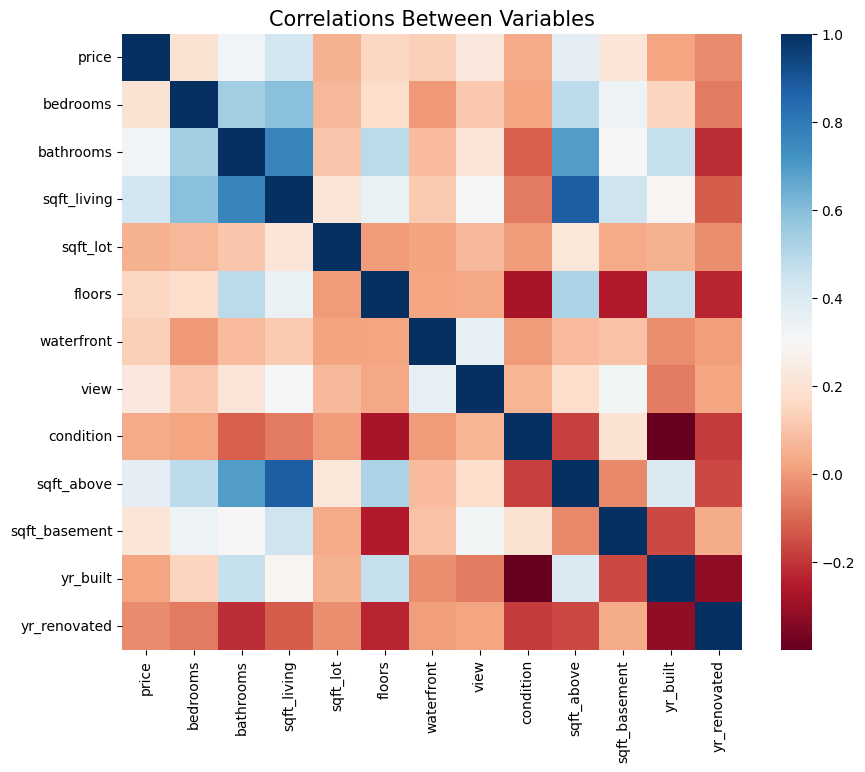

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
important_num_cols = list(df.corr()["price"][(df.corr()["price"]>0.50) | (df.corr()["price"]<-0.50)].index)
cat_cols = ["sqft_lot", "waterfront", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
price            0
sqft_lot         0
waterfront       0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<Axes: title={'center': 'Year Built '}, xlabel='yr_built'>

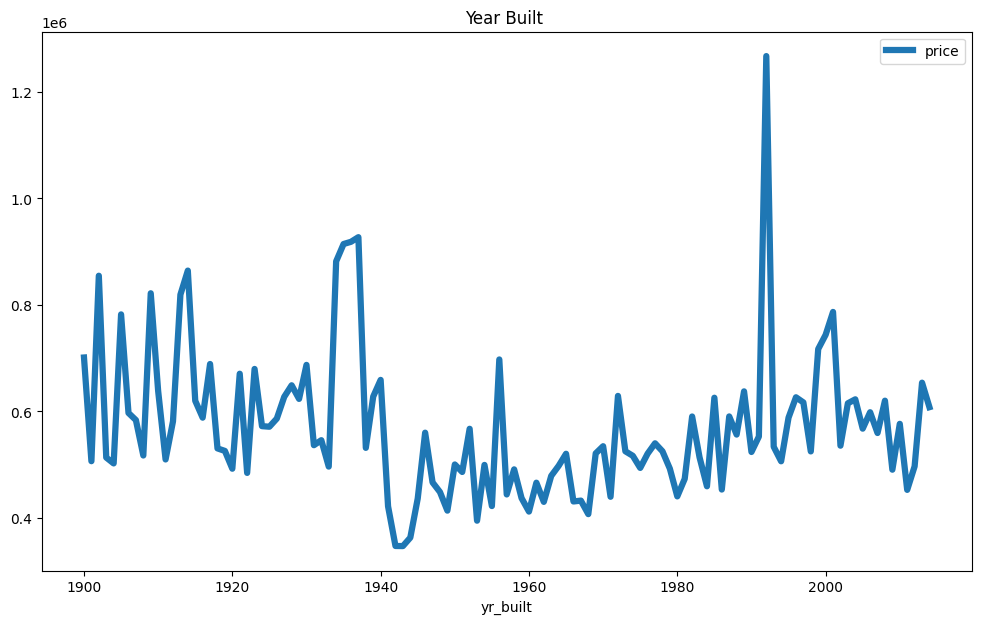

In [ ]:
vis_1=pd.pivot_table(df, index=['yr_built'],values = ['price'],aggfunc = 'mean')
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Year Built ')

<Figure size 1000x800 with 0 Axes>

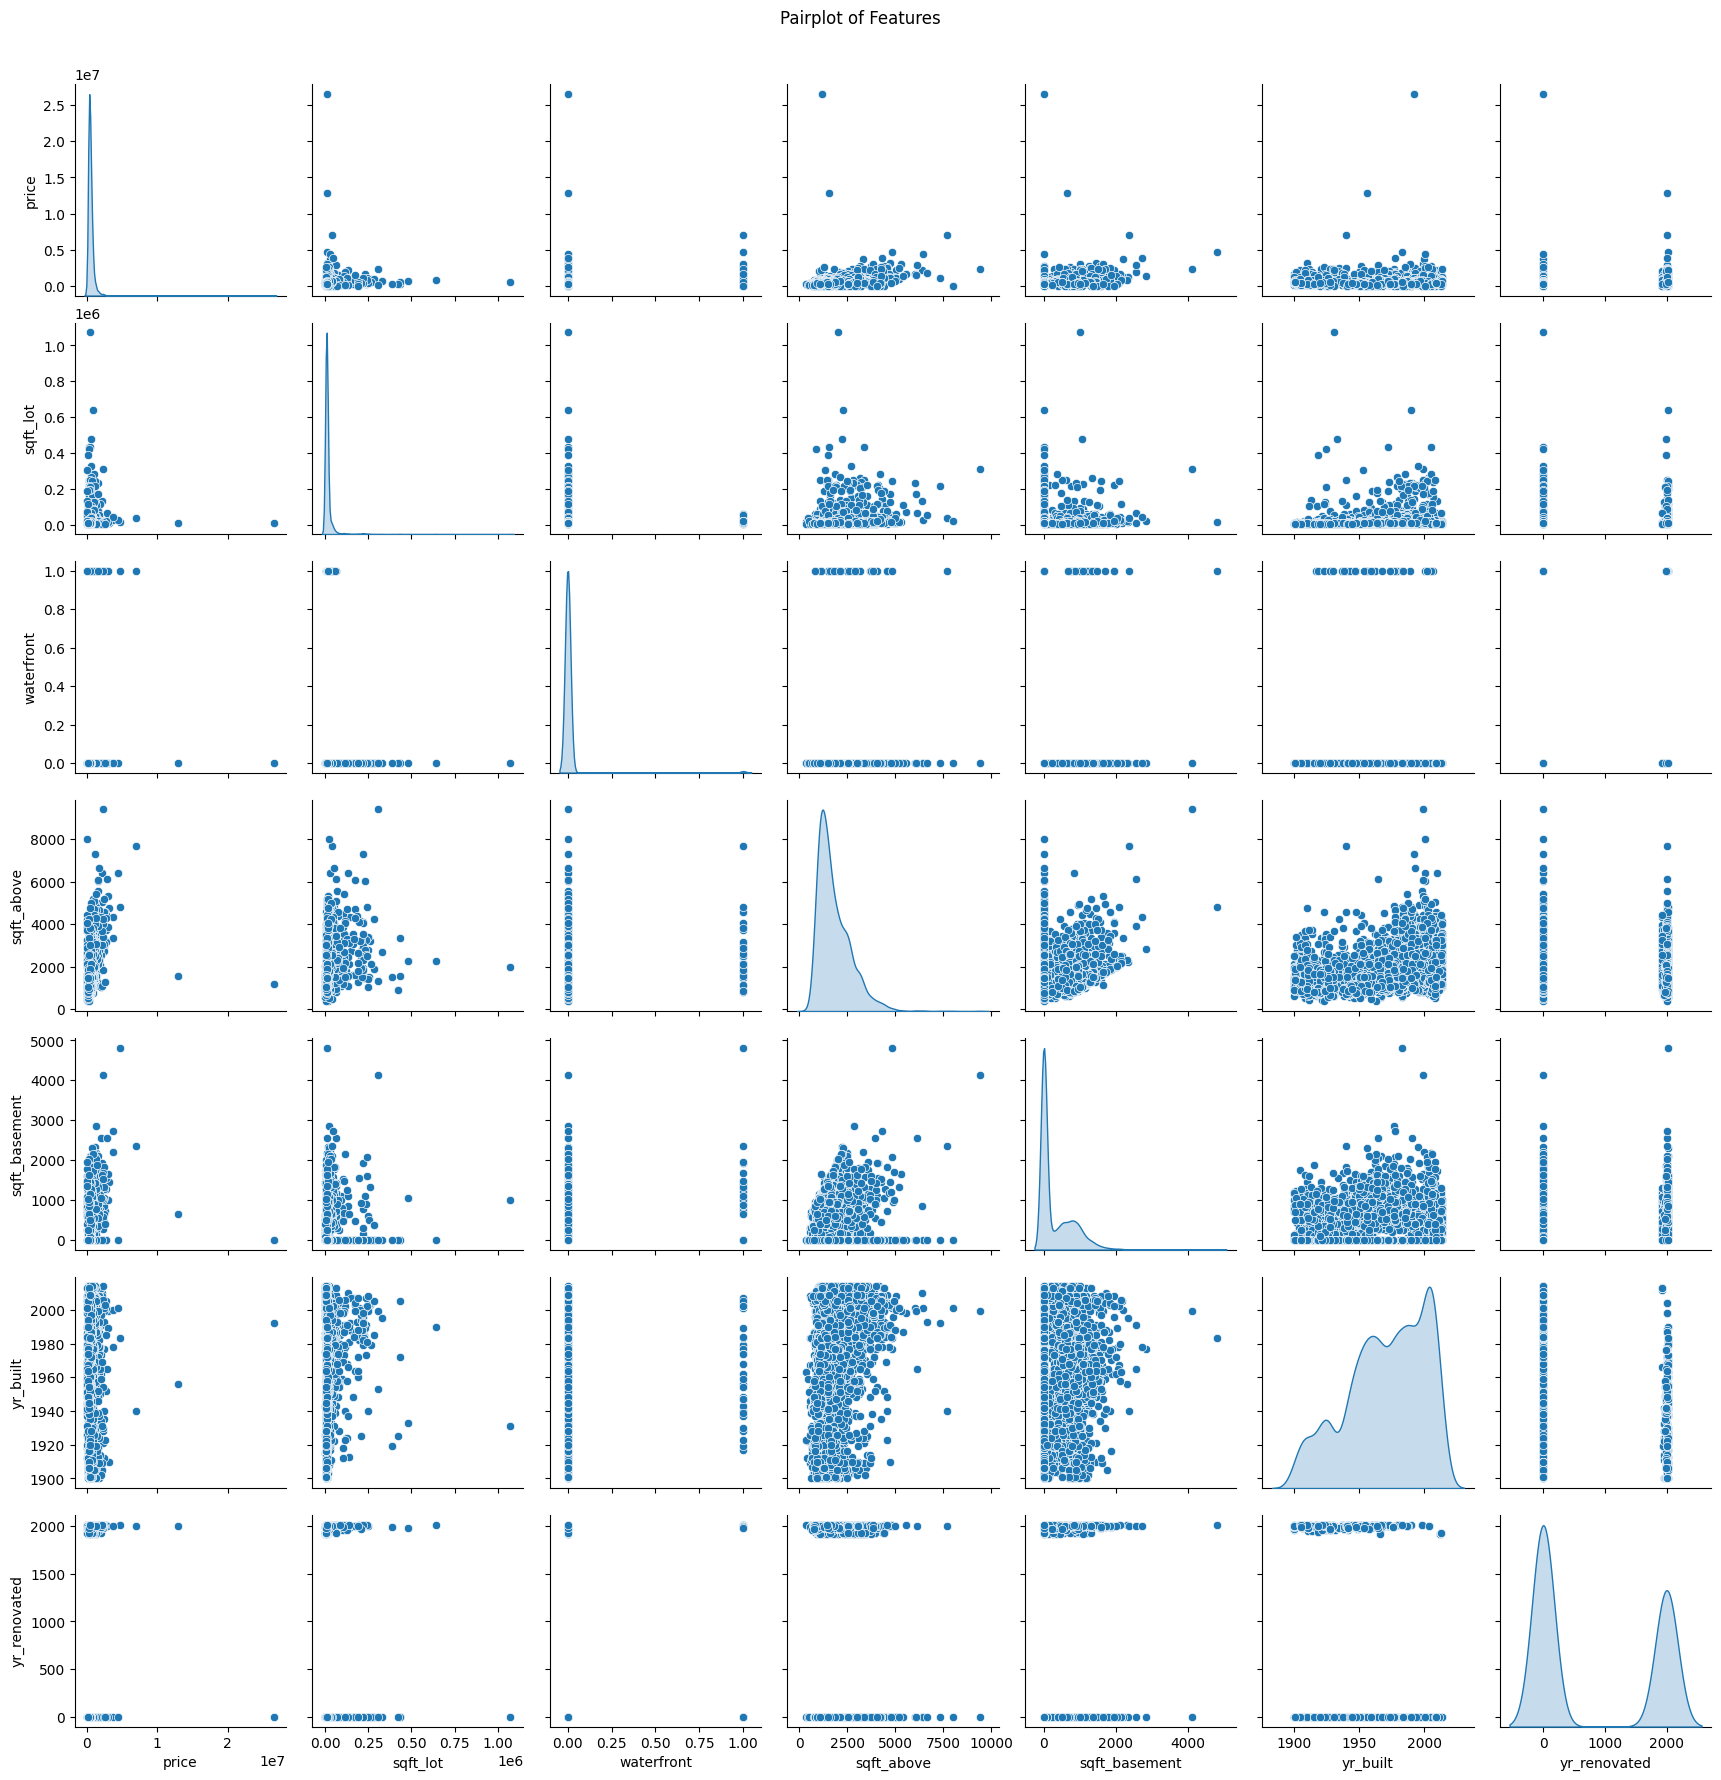

In [ ]:
# Pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

<Figure size 800x200 with 0 Axes>

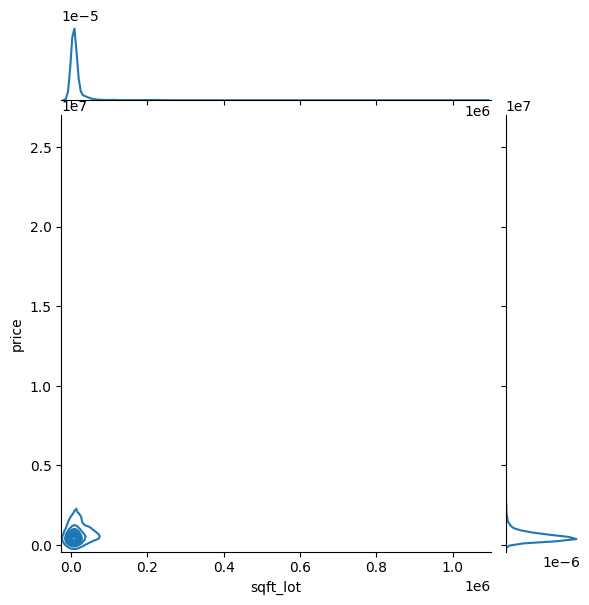

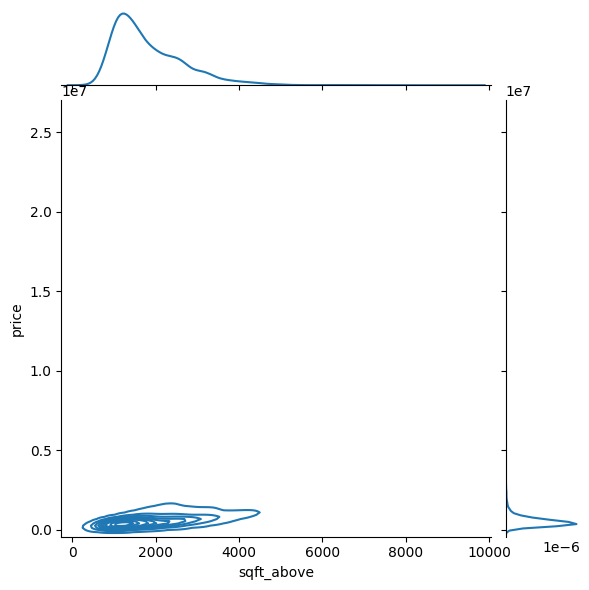

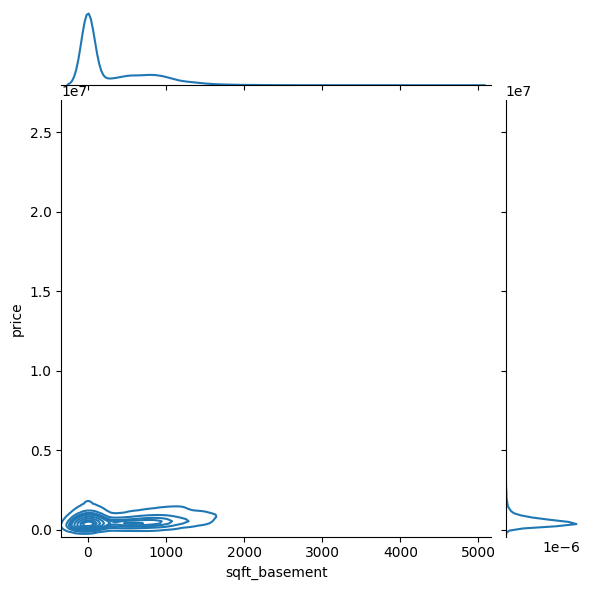

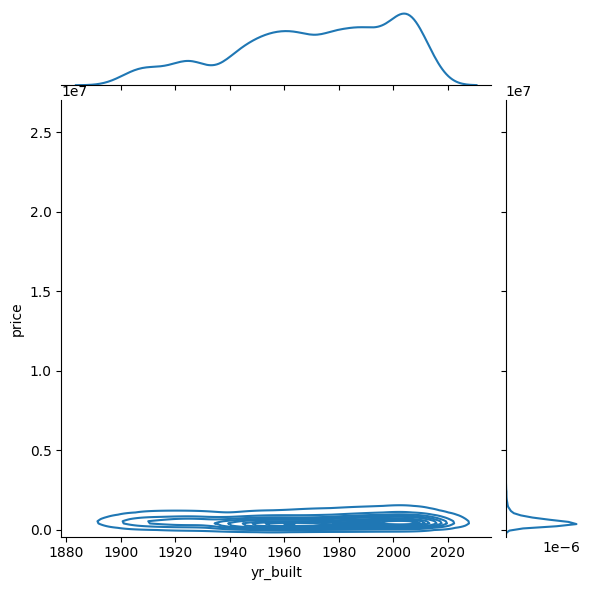

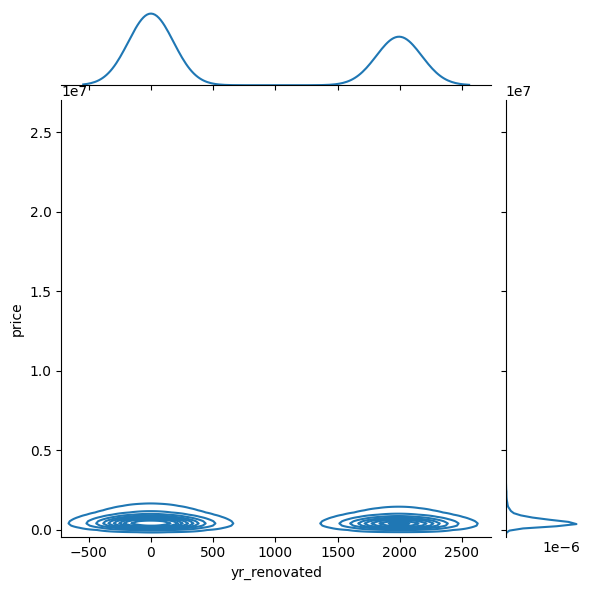

In [ ]:
plt.figure(figsize=(8,2))
sns.jointplot(x=df["sqft_lot"], y=df["price"], kind="kde")
sns.jointplot(x=df["sqft_above"], y=df["price"], kind="kde")
sns.jointplot(x=df["sqft_basement"], y=df["price"], kind="kde")
sns.jointplot(x=df["yr_built"], y=df["price"], kind="kde")
sns.jointplot(x=df["yr_renovated"], y=df["price"], kind="kde")
plt.show()

In [ ]:
X = df.drop('price', axis=1)
y = df['price']
# splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3680, 16), (920, 16), (3680,), (920,))

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'year', 'month', 'total_rooms', 'age'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  year           4600 non-null   int64  
 14  month          4600 non-null   int64  
 15  total_rooms    4600 non-null   float64
 16  age            4600 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 611.1 KB


In [ ]:
# Define preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns)
    ])

In [ ]:
# Decesion Tree
# Define model pipeline
model_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_pipeline_dt.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_dt)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_dt)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_dt)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('RMSE:',RMSE)


r2 score: -0.03585909524194575
MAE: 275866.77631419135
MSE: 1056417107128.2825
RMSE: 1027821.5346684863


In [ ]:
# Define linear regression model pipeline
model_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_pipeline_lr.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_lr)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_lr)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_lr)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('RMSE:',RMSE)

r2 score: 0.03262150065117553
MAE: 211012.8839049454
MSE: 986577422039.7091
RMSE: 993266.0378970526


In [ ]:
#Random Forest
# Define model pipeline
model_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_pipeline_rf.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_rf)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_rf)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_rf)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE:',RMSE)

r2 score: 0.022258291640238403
MAE: 212537.5095535777
MSE: 997146302821.0695
RMSE: 998572.132007032


In [ ]:
#KNN
# Define model pipeline
model_pipeline_kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_kn.fit(X_train, y_train)

# Make predictions
y_pred_kn = model_pipeline_kn.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_kn)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_kn)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_kn)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_kn))
print('RMSE:',RMSE)

r2 score: 0.02359597882142217
MAE: 217705.21329190215
MSE: 995782067445.1578
RMSE: 997888.8051507331


In [ ]:
#SVM
# Define model pipeline
model_pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])

# Same train-test split as before

# Train the model
model_pipeline_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_pipeline_svm.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_svm)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_svm)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_svm)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_svm))
print('RMSE:',RMSE)

r2 score: -0.012668543939129195
MAE: 266539.0865299833
MSE: 1032766308257.5063
RMSE: 1016251.1049231417


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor()

# Define model pipeline
model_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gradient_boosting_model)
])

# Train the model on the entire training dataset
model_pipeline_gb.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_gb = model_pipeline_gb.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Print evaluation metrics
print("Evaluation Metrics for Gradient Boosting Regressor:")
print(f"R² Score: {r2_gb:.4f}")
print(f"Mean Absolute Error: {mae_gb:.4f}")
print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"Root Mean Squared Error: {rmse_gb:.4f}")


Evaluation Metrics for Gradient Boosting Regressor:
R² Score: 0.0342
Mean Absolute Error: 203291.8836
Mean Squared Error: 984941830156.5562
Root Mean Squared Error: 992442.3561


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Define the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor()

# Define model pipeline
model_pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', adaboost_model)
])

# Train the model on the entire training dataset
model_pipeline_adaboost.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_adaboost = model_pipeline_adaboost.predict(X_test)

# Evaluate the model
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)

# Print evaluation metrics
print("Evaluation Metrics for AdaBoost Regressor:")
print(f"R² Score: {r2_adaboost:.4f}")
print(f"Mean Absolute Error: {mae_adaboost:.4f}")
print(f"Mean Squared Error: {mse_adaboost:.4f}")
print(f"Root Mean Squared Error: {rmse_adaboost:.4f}")


Evaluation Metrics for AdaBoost Regressor:
R² Score: -0.0802
Mean Absolute Error: 461927.8407
Mean Squared Error: 1101671413615.2251
Root Mean Squared Error: 1049605.3609


In [ ]:
from xgboost import XGBRegressor

# Define the XGBoost Regressor model
xgboost_model = XGBRegressor()

# Define model pipeline
model_pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgboost_model)
])

# Train the model on the entire training dataset
model_pipeline_xgboost.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_xgboost = model_pipeline_xgboost.predict(X_test)

# Evaluate the model
r2_xgboost = r2_score(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

# Print evaluation metrics
print("Evaluation Metrics for XGBoost Regressor:")
print(f"R² Score: {r2_xgboost:.4f}")
print(f"Mean Absolute Error: {mae_xgboost:.4f}")
print(f"Mean Squared Error: {mse_xgboost:.4f}")
print(f"Root Mean Squared Error: {rmse_xgboost:.4f}")


Evaluation Metrics for XGBoost Regressor:
R² Score: 0.0204
Mean Absolute Error: 215278.0819
Mean Squared Error: 999012076097.8348
Root Mean Squared Error: 999505.9160


In [ ]:

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),

}

# Cross-validation to find MSE
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Perform cross-validation with MSE as the scoring metric
    mse_scores = -cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

    # Print mean MSE and standard deviation of MSE
    print(f"{name} MSE: {mse_scores.mean():.4f} (± {mse_scores.std():.4f})")

Linear Regression MSE: 255310659177.6181 (± 392720843113.7072)
Decision Tree MSE: 558992945678.1471 (± 419649477992.3168)
Random Forest MSE: 317201938756.3823 (± 372981754609.3550)
kNN MSE: 302767651647.2257 (± 369717063180.0024)
SVR MSE: 325960554269.2477 (± 369301723463.5843)
Gradient Boosting MSE: 322178011351.5494 (± 383402361452.0797)
AdaBoost MSE: 595863851057.2463 (± 638712723114.5332)
XGBoost MSE: 362774888723.4986 (± 369998708373.6218)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
}

# Evaluate each model and store the results
results = {}
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model on the entire training dataset
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    results[name] = {'R² Score': r2, 'Mean Absolute Error': mae,
                     'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Evaluation Results:

Linear Regression:
R² Score: 0.0319
Mean Absolute Error: 216853.2145
Mean Squared Error: 987298810082.0052
Root Mean Squared Error: 993629.1109

Decision Tree:
R² Score: -0.0121
Mean Absolute Error: 253223.9400
Mean Squared Error: 1032216599094.8630
Root Mean Squared Error: 1015980.6096

Random Forest:
R² Score: 0.0225
Mean Absolute Error: 212790.9795
Mean Squared Error: 996929817162.9058
Root Mean Squared Error: 998463.7285

kNN:
R² Score: 0.0236
Mean Absolute Error: 217705.2133
Mean Squared Error: 995782067445.1578
Root Mean Squared Error: 997888.8052

SVR:
R² Score: -0.0134
Mean Absolute Error: 267331.6377
Mean Squared Error: 1033480895187.3007
Root Mean Squared Error: 1016602.6240

Gradient Boosting:
R² Score: 0.0348
Mean Absolute Error: 202665.9843
Mean Squared Error: 984343653345.2933
Root Mean Squared Error: 992140.9443

AdaBoost:
R² Score: -0.0549
Mean Absolute Error: 420667.3241
Mean Squared Error: 1075816332809.9913
Root Mean Squared Error: 1037215.6636



In [ ]:

# Dictionary to store R² scores for each model
r2_scores = {}

# Cross-validation to find R² score for each model
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Perform cross-validation with R² score as the scoring metric
    r2 = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

    # Store mean R² score
    r2_scores[name] = r2.mean()

# Print R² scores for each model
for name, r2 in r2_scores.items():
    print(f"R² score for {name}: {r2:.4f}")

R² score for Linear Regression: 0.4698
R² score for Decision Tree: -0.1991
R² score for Random Forest: 0.2708
R² score for kNN: 0.3255
R² score for SVR: -0.0495
R² score for Gradient Boosting: -0.0999
R² score for AdaBoost: -0.4632
R² score for XGBoost: 0.1201
